In [1]:
# coding: utf8
#http://easydan.com/arts/2016/hierarchy-clustering/ - источник
%matplotlib inline
# Общие функции кластеризации
from scipy.cluster.hierarchy import *
from scipy.spatial.distance import pdist

# Для оценки качества кластеров как смеси распределений
from sklearn import mixture

# Анализа главных компонент
from sklearn.decomposition import PCA 

# Линейный дискриминантный анализ
from sklearn.lda import LDA


# Для загрузки данных из xls документа
import pandas as pd

# Для отрисовки графиков
from pylab import *

/Users/romanmatiiv/anaconda/lib/python2.7/site-packages/sklearn/lda.py:6: DeprecationWarning: lda.LDA has been moved to discriminant_analysis.LinearDiscriminantAnalysis in 0.17 and will be removed in 0.19
  "in 0.17 and will be removed in 0.19", DeprecationWarning)


In [2]:
# Для вопроизодимости результатов, зависящих от генератора случайных чисел
np.random.seed(1000)


# Настройка шрифтов для будущих графиков
rcParams['font.family'] = 'DejaVu Sans' # Понимает русские буквы
rcParams['font.size'] = 16


In [3]:
# Загрузим данные из xls документа
data = pd.read_excel('data.xls')

# Уберем последнюю букву из наименования строк,
# она в кириллице и могут быть проблемы с 
# пакетами программ ниже
labels = map(lambda x: x[:-1], list(data['name']))


# Выделим данные, начиная с первой колонки
# Это то, что подлежит анализу
data_for_clust =  data.ix[:,1:].as_matrix()

/Users/romanmatiiv/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:12: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate_ix
  if sys.path[0] == '':


In [8]:
#Main
# Вычислим расстояния между каждым набором данных,
# т.е. строками массива data_for_clust
# Вычисляется евклидово расстояние (по умолчанию)
data_dist = pdist(data_for_clust, 'euclidean')
#Main
# Главная функция иерархической кластеризии
# Объедение элементов в кластера и сохранение в 
# специальной переменной (используется ниже для визуализации 
# и выделения количества кластеров
data_linkage = linkage(data_dist, method='average')

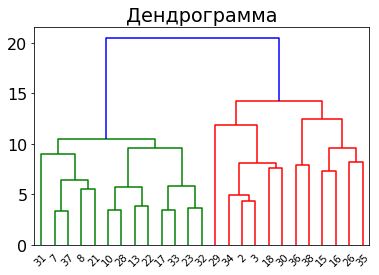

In [11]:
figure()
dendrogram(data_linkage, labels=labels)
title(u'Дендрограмма')

show()

# K-means

In [12]:
from sklearn.cluster import KMeans

In [13]:
kmeans = KMeans(n_clusters=2, random_state=0).fit(data_for_clust)

In [15]:
pred=kmeans.labels_

In [16]:
len(pred)

25

In [19]:
pred

array([1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1,
       0, 1], dtype=int32)